## PREDICT THE BURNED AREA OF FOREST FIRES ( Small , Large)
#forestfires.csv

In [1]:
# Importing necessary libraris
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn 
%matplotlib inline
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler 
from sklearn.svm import SVC

In [2]:
# Reading dataset and assigning in frame
df = pd.read_csv("C:\\Users\\Raja\\Downloads\\assignments\\svm\\forestfires.csv")

In [3]:
# Showing five bottom records
df.tail()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
512,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,...,0,0,0,0,0,0,0,0,0,large
513,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,...,0,0,0,0,0,0,0,0,0,large
514,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,...,0,0,0,0,0,0,0,0,0,large
515,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,...,0,0,0,0,0,0,0,0,0,small
516,nov,tue,79.5,3.0,106.7,1.1,11.8,31,4.5,0.0,...,0,0,0,0,0,0,1,0,0,small


In [4]:
# Knowing the shape i.e. rows x cols of df
df.shape

(517, 31)

In [5]:
# Showing the columns of dataframe
df.columns

Index(['month', 'day', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind',
       'rain', 'area', 'dayfri', 'daymon', 'daysat', 'daysun', 'daythu',
       'daytue', 'daywed', 'monthapr', 'monthaug', 'monthdec', 'monthfeb',
       'monthjan', 'monthjul', 'monthjun', 'monthmar', 'monthmay', 'monthnov',
       'monthoct', 'monthsep', 'size_category'],
      dtype='object')

In [6]:
# Showing the unique values of fire category
df.size_category.unique()

array(['small', 'large'], dtype=object)

In [7]:
# Showing the value counts of unique category 
df.size_category.value_counts()

small    378
large    139
Name: size_category, dtype: int64

In [8]:
# Creating dummies var for columns month,day,size_category with dropping first columns
df_after=pd.get_dummies(df,columns={'month','day','size_category'},drop_first=True)

In [9]:
# Knowing the columns of dataframe
df_after.columns

Index(['FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind', 'rain', 'area',
       'dayfri', 'daymon', 'daysat', 'daysun', 'daythu', 'daytue', 'daywed',
       'monthapr', 'monthaug', 'monthdec', 'monthfeb', 'monthjan', 'monthjul',
       'monthjun', 'monthmar', 'monthmay', 'monthnov', 'monthoct', 'monthsep',
       'month_aug', 'month_dec', 'month_feb', 'month_jan', 'month_jul',
       'month_jun', 'month_mar', 'month_may', 'month_nov', 'month_oct',
       'month_sep', 'day_mon', 'day_sat', 'day_sun', 'day_thu', 'day_tue',
       'day_wed', 'size_category_small'],
      dtype='object')

In [10]:
# Using Normalization function 
def norm_func(i):
    x = (i-i.min())/(i.max()-i.min())
    return (x)

In [11]:
# Normalized data frame (considering the numerical part of data)
df_norm = norm_func(df_after.iloc[:,:])
df_norm.tail()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,month_nov,month_oct,month_sep,day_mon,day_sat,day_sun,day_thu,day_tue,day_wed,size_category_small
512,0.811613,0.191592,0.771315,0.033868,0.823151,0.200000,0.255556,0.0,0.005904,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
513,0.811613,0.191592,0.771315,0.033868,0.633441,0.658824,0.600000,0.0,0.049769,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
514,0.811613,0.191592,0.771315,0.033868,0.610932,0.647059,0.700000,0.0,0.010231,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
515,0.976774,0.499311,0.711622,0.201426,0.752412,0.317647,0.400000,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
516,0.784516,0.006547,0.115867,0.019608,0.308682,0.188235,0.455556,0.0,0.000000,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0


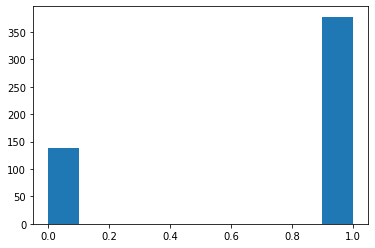

In [12]:
# Ploting of histogram & knowing size category i.e. 0 - large, 1-small
plt.hist(df_after.size_category_small)
plt.show()

In [13]:
df_norm.corr()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,month_nov,month_oct,month_sep,day_mon,day_sat,day_sun,day_thu,day_tue,day_wed,size_category_small
FFMC,1.000000,0.382619,0.330512,0.531805,0.431532,-0.300995,-0.028485,0.056702,0.040122,0.019306,...,-0.088964,-0.005998,0.076609,-0.059396,-0.019637,-0.089517,0.071730,0.011225,0.093908,-0.022063
DMC,0.382619,1.000000,0.682192,0.305128,0.469594,0.073795,-0.105342,0.074790,0.072994,-0.012010,...,-0.074218,-0.187632,0.110907,-0.107921,-0.003653,0.025355,0.087672,0.000016,0.017939,-0.034715
DC,0.330512,0.682192,1.000000,0.229154,0.496208,-0.039192,-0.203466,0.035861,0.049383,-0.004220,...,-0.078380,0.093279,0.531857,-0.052993,-0.035189,-0.001431,0.051859,0.028368,0.024803,-0.019428
ISI,0.531805,0.305128,0.229154,1.000000,0.394287,-0.132517,0.106826,0.067668,0.008258,0.046695,...,-0.076559,-0.071154,-0.068877,-0.158601,-0.038585,-0.003243,-0.022406,0.068610,0.125415,0.008726
temp,0.431532,0.469594,0.496208,0.394287,1.000000,-0.527390,-0.227116,0.069491,0.097844,-0.071949,...,-0.053798,-0.053513,0.088006,-0.136529,0.034899,0.014403,0.051432,0.035630,0.090580,-0.006021
RH,-0.300995,0.073795,-0.039192,-0.132517,-0.527390,1.000000,0.069410,0.099751,-0.075519,0.064506,...,-0.035885,-0.072334,-0.062596,0.009376,-0.023869,0.136220,-0.123061,-0.014211,-0.087508,0.045243
wind,-0.028485,-0.105342,-0.203466,0.106826,-0.227116,0.069410,1.000000,0.061119,0.012317,0.118090,...,0.011864,-0.053850,-0.181476,-0.063881,-0.063799,0.027981,-0.062553,0.053396,-0.019965,-0.059113
rain,0.056702,0.074790,0.035861,0.067668,0.069491,0.099751,0.061119,1.000000,-0.007366,-0.004261,...,-0.003225,-0.012665,-0.051733,-0.029945,-0.032271,-0.017872,-0.026798,0.139311,-0.020744,-0.050001
area,0.040122,0.072994,0.049383,0.008258,0.097844,-0.075519,0.012317,-0.007366,1.000000,-0.052911,...,-0.008893,-0.016878,0.056573,-0.021206,0.087868,-0.020463,0.020121,-0.001333,-0.011452,-0.311322
dayfri,0.019306,-0.012010,-0.004220,0.046695,-0.071949,0.064506,0.118090,-0.004261,-0.052911,1.000000,...,-0.019527,-0.045585,0.107671,-0.181293,-0.195372,-0.210462,-0.162237,-0.166728,-0.151487,0.021810


In [14]:
# Feature_col=data.drop(['size_category_small'],axis=1)
# Output_target=['size_category_small']
X = df_norm.drop(['size_category_small'],axis=1)
Y = df_norm['size_category_small']

In [15]:
# Training and Testing process
Xtrain, Xtest, ytrain, ytest = train_test_split(X, Y, test_size=0.2, random_state=0)

In [16]:
#Performing preprocessing part 
sc = StandardScaler() 
Xtrain = sc.fit_transform(Xtrain) 
Xtest = sc.transform(Xtest) 

In [17]:
# Applying PCA function on training 
# and testing set of X component 
from sklearn.decomposition import PCA 
  
pca = PCA(n_components = 5) 
  
Xtrain = pca.fit_transform(Xtrain) 
Xtest = pca.transform(Xtest) 
  
explained_variance = pca.explained_variance_ratio_ 

In [18]:
# Create SVM classification object 
# Using kernal='linear', 'poly', 'rbf', 'sigmoid', 'precomputed'
model_linear = SVC(kernel = "linear")
model_linear.fit(Xtrain,ytrain)
pred_test_linear = model_linear.predict(Xtest)
pred_test_linear


array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1.])

In [19]:
np.mean(pred_test_linear==ytest)

0.7115384615384616

In [20]:
#kernal='poly'
model_linear = SVC(kernel = "poly")
model_linear.fit(Xtrain,ytrain)
pred_test_linear = model_linear.predict(Xtest)
pred_test_linear

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1.])

In [21]:
np.mean(pred_test_linear==ytest)

0.7019230769230769

In [22]:
#kernal='rbf'
model_linear = SVC(kernel = "rbf")
model_linear.fit(Xtrain,ytrain)
pred_test_linear = model_linear.predict(Xtest)
pred_test_linear

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1.])

In [26]:
np.mean(pred_test_linear==ytest)

0.7115384615384616

In [27]:
#kernal='sigmoid'
model_linear = SVC(kernel = "sigmoid")
model_linear.fit(Xtrain,ytrain)
pred_test_linear = model_linear.predict(Xtest)
pred_test_linear

array([0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1.,
       1., 0., 0., 0., 0., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 0., 0., 0.,
       1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       0., 1., 0., 0., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 0., 0., 0.,
       1., 1.])

In [28]:
np.mean(pred_test_linear==ytest)

0.6923076923076923

In [29]:
# Confusion matrix SVM model
confusion_matrix(ytest,pred_test_linear) 

array([[ 9, 21],
       [11, 63]], dtype=int64)

In [30]:
pd.crosstab(ytest.values.flatten(),pred_test_linear) # confusion matrix using 

col_0,0.0,1.0
row_0,,
0.0,9,21
1.0,11,63
